In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3
import warnings
from scipy.stats import ttest_ind
warnings.filterwarnings('ignore')

In [2]:
conn=sqlite3.connect('retail.db')

In [3]:
df=pd.read_sql(""" select * from SummarY_Table""",conn)

In [4]:
df.shape

(62772, 17)

In [5]:
df.head()

,Customer_ID,Customer_Name,city,state,country,product_name,category,storekey,Store_State,Store_Country,Total_Quantity,Unit_Cost_USD,Unit_Price_USD,Total_Cost,Total_Sales,Gross_Profit,Gross_Margin
0,117386,Christopher Currie,WAMBERAL,New South Wales,Australia,NT Wireless Bluetooth Stereo Headphones M402 S...,Audio,1,Australian Capital Territory,Australia,2.0,9.06,10.0,18.12,20.0,1.88,0.09
1,122096,Alannah Wolinski,PAMPAS,Queensland,Australia,WWI Laptop8.9 E0089 Black,Computers,6,Western Australia,Australia,4.0,5.40,10.0,21.60,40.0,18.40,0.46
2,125236,Jordan Sissons,MORNINGTON ISLAND,Queensland,Australia,NT Wireless Bluetooth Stereo Headphones M402 S...,Audio,1,Australian Capital Territory,Australia,1.0,9.06,10.0,9.06,10.0,0.94,0.09
3,127417,Elizabeth Brookman,RIDDELLS CREEK,Victoria,Australia,WWI Laptop8.9 E0089 Black,Computers,5,Victoria,Australia,7.0,5.40,10.0,37.80,70.0,32.20,0.46
4,211809,Alexander Norman,Windsor,Ontario,Canada,NT Wireless Bluetooth Stereo Headphones M402 S...,Audio,10,Nunavut,Canada,1.0,9.06,10.0,9.06,10.0,0.94,0.09


#  Exploratory Data Analysis:

- Previously we have examined various tables in the database to identify key variables, understand their relationship and determined which one should be included in the final analysis

- In this phase of EDA, we will analyse the resultant table to gain insights into the districution of each column, This will help us understand the data patterns, identify anamolies and ensure data quality before proceeding  wuth further analysis

In [6]:
df.describe()

,Customer_ID,storekey,Total_Quantity,Unit_Cost_USD,Unit_Price_USD,Total_Cost,Total_Sales,Gross_Profit,Gross_Margin
count,6.277200e+04,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000,62772.000000
mean,1.180822e+06,31.800819,3.150401,7.471155,12.505510,23.515849,39.424250,15.908402,0.394379
std,5.859164e+05,22.979233,2.262465,1.458739,1.439215,17.767456,28.888168,14.014507,0.139011
min,3.010000e+02,0.000000,1.000000,5.000000,10.000000,5.000000,10.000000,0.080000,0.010000
25%,6.808580e+05,8.000000,1.000000,6.160000,11.300000,9.320000,14.300000,5.930000,0.300000
50%,1.261289e+06,37.000000,2.000000,7.445000,12.480000,17.980000,29.720000,11.280000,0.400000
75%,1.686269e+06,53.000000,4.000000,8.750000,13.780000,31.600000,54.085000,21.320000,0.510000
max,2.099937e+06,66.000000,15.000000,10.000000,15.000000,144.300000,187.200000,100.000000,0.670000


In [7]:
numerical_columns=df.select_dtypes(include='number').columns
(numerical_columns)

Index(['Customer_ID', 'storekey', 'Total_Quantity', 'Unit_Cost_USD',
       'Unit_Price_USD', 'Total_Cost', 'Total_Sales', 'Gross_Profit',
       'Gross_Margin'],
      dtype='object')

In [8]:
numerical_list=list(numerical_columns)
numerical_list.pop(0)
numerical_list

['storekey',
 'Total_Quantity',
 'Unit_Cost_USD',
 'Unit_Price_USD',
 'Total_Cost',
 'Total_Sales',
 'Gross_Profit',
 'Gross_Margin']

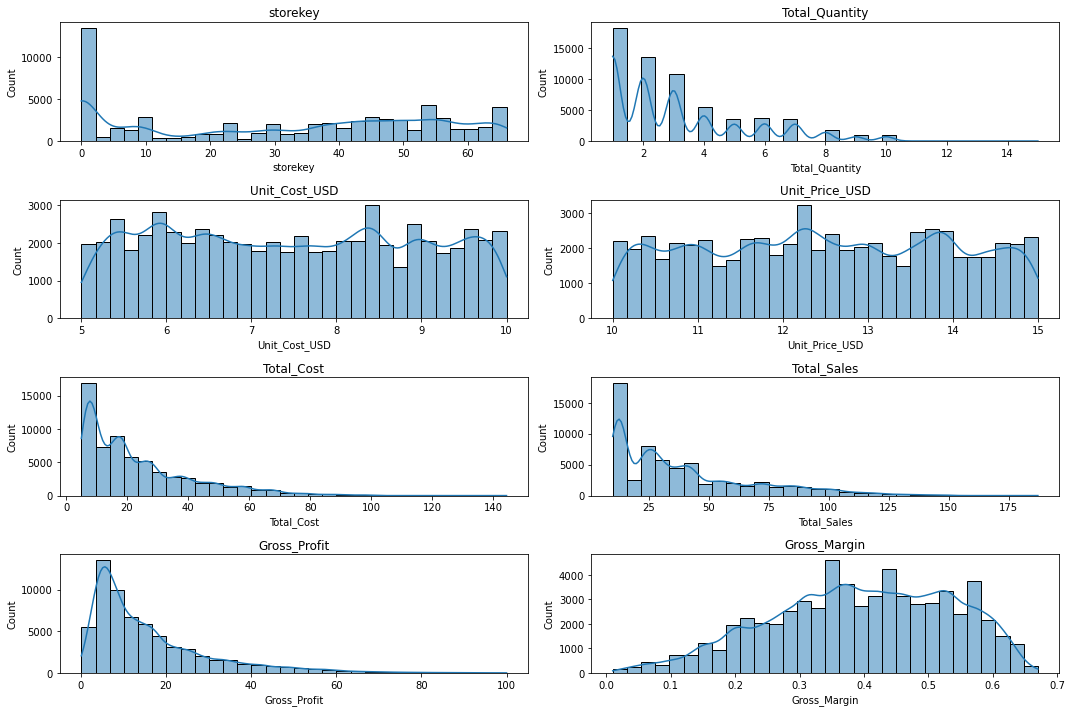

In [9]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_list):
    plt.subplot(4,2,i+1)
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

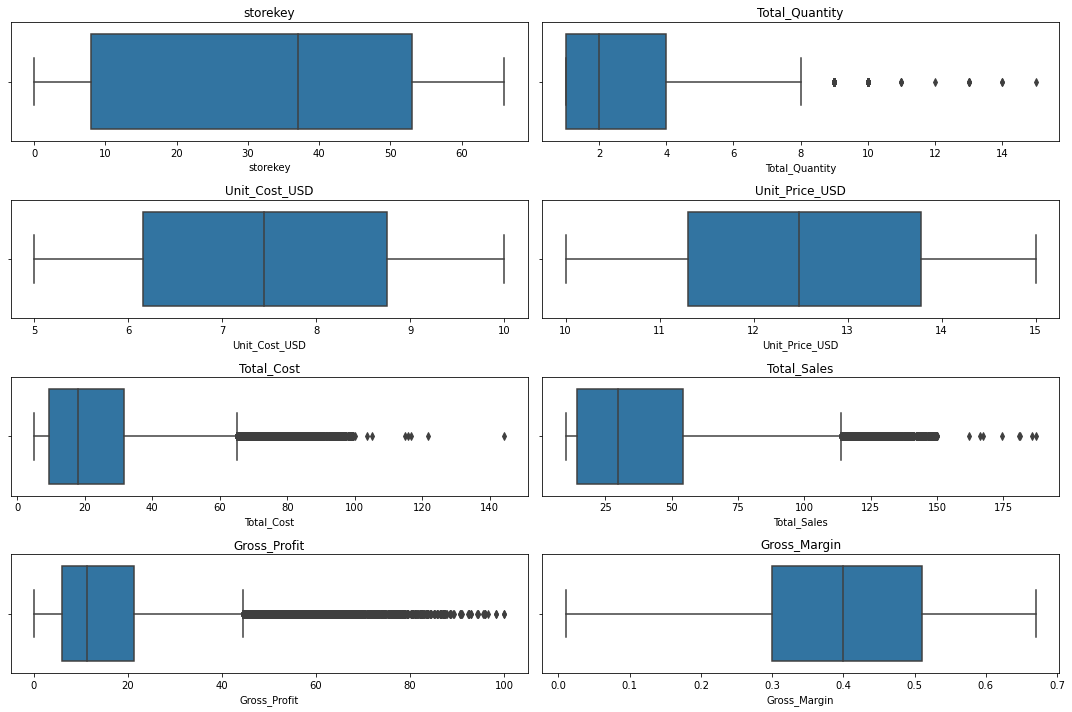

In [10]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_list):
    plt.subplot(4,2,i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:

- Total Quantity: Total quantity count is more for 1, 2 and 3 quantities, which tells us most of the customers are instrested in placing single quantity orders, less bulk orders

- Total cost and Total sales : The max values(144.3,187.2) which are higher than the mean(23.51,39.42) this may be due to bulk ordering of some products and this is also reason for max Gross_profit in some orders

In [11]:
df.describe(include='object')

,Customer_Name,city,state,country,product_name,category,Store_State,Store_Country
count,62772,62772,62772,62772,62772,62772,62772,62772
unique,11783,6570,491,8,2492,8,58,9
top,Gaspare Trevisan,Toronto,California,United States,Adventure Works Desktop PC2.30 MD230 Black,Computers,Online,United States
freq,35,681,3625,33712,160,13990,13146,26509


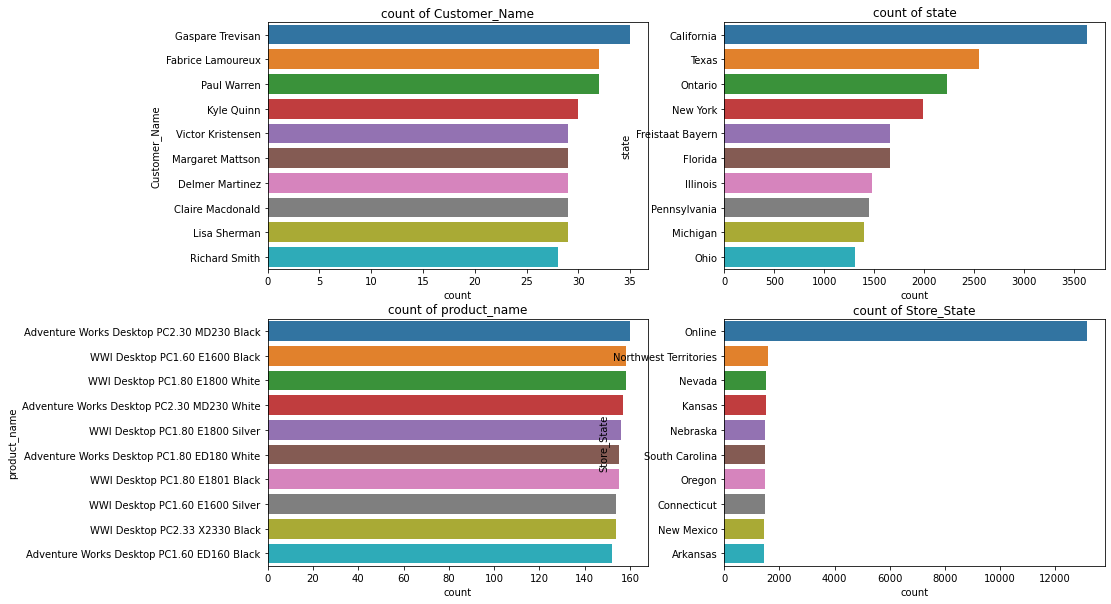

In [12]:
categorical_columns=['Customer_Name','state','product_name','Store_State']

plt.figure(figsize=(15,10))
for i,col in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10
    plt.title(f"count of {col}")
plt.tight_layout
plt.show()

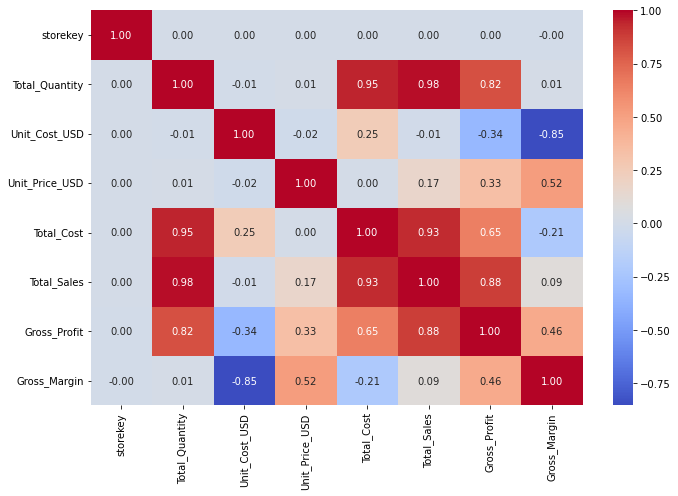

In [13]:
correlation_matrix=df[numerical_list].corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,annot=True, fmt=".2f",cmap="coolwarm")
plt.tight_layout()
plt.show()

# Correlation Insights:

- Unit_Cost_USD has strong negative correlation with Gross_Margin(-0.85) and Gross_Profit(-0.34) suggests costprice per unit increses, Gross_Profit and Gross_Margin decreses, possibly due to more discoutns on the product

- Gross_Profit has strong positive correlation with Total_Quantity, confirming bulk orders reults high profits

- Unit_Price_USD has positve correlation with Gross_Margin(0.52), suggests Unit_Price_USD increses, Gross_Margin increses, if we change prices in an optimal way results in increse in Gross_Margin

# Data Analysis:

- Which states generate the highest and lowest gross profits?


In [14]:
High_profit_regions=df.groupby(['state','country']).agg({"Total_Sales":"sum","Gross_Profit":'sum','Total_Quantity':'sum'}).sort_values('Gross_Profit',ascending=False).reset_index().head(10)
High_profit_regions.head()

,state,country,Total_Sales,Gross_Profit,Total_Quantity
0,California,United States,141645.93,57406.55,11295.0
1,Texas,United States,97917.05,39159.40,7866.0
2,Ontario,Canada,87827.70,35488.00,6989.0
3,New York,United States,78830.32,32089.15,6305.0
4,Florida,United States,67475.06,27458.04,5362.0


In [15]:
Low_profit_regions=df.groupby(['state','country']).agg({"Total_Sales":"sum","Gross_Profit":'sum','Total_Quantity':'sum'}).sort_values('Gross_Profit',ascending=True).reset_index().head(10)
Low_profit_regions.head()

,state,country,Total_Sales,Gross_Profit,Total_Quantity
0,Redcar & Cleveland,United Kingdom,40.88,2.28,4.0
1,Prato,Italy,11.88,4.37,1.0
2,Renfrewshire,United Kingdom,22.19,5.38,2.0
3,Lanarkshire,United Kingdom,12.52,5.81,1.0
4,Tameside,United Kingdom,25.03,6.68,2.0


In [16]:
def format(num):
    if num>=1000000:
        return str(round(num/1000000,2))+'M'
    elif num>=1000:
        return str(round(num/1000,2))+'K'
    else:
        return round(num,2)

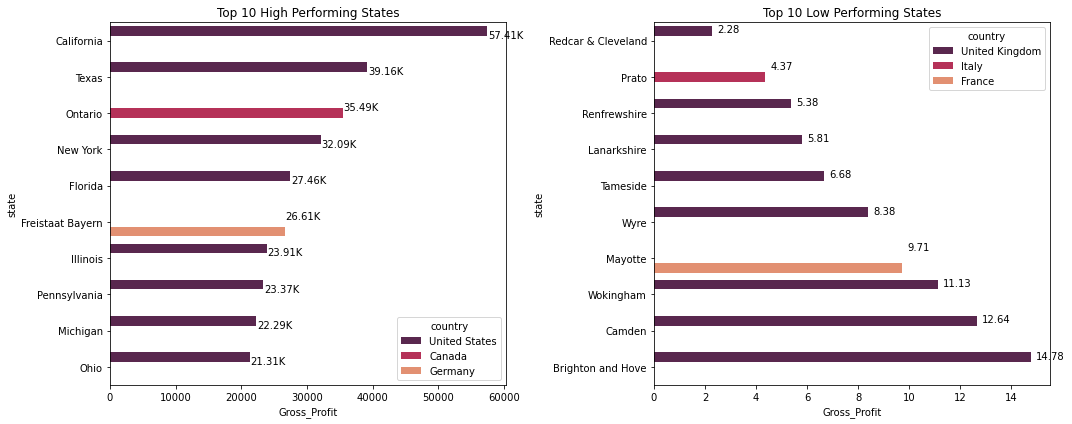

In [17]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
ax1=sns.barplot(data=High_profit_regions,x='Gross_Profit',y='state',hue='country',palette='rocket')
plt.title('Top 10 High Performing States')

for i,v in enumerate(High_profit_regions['Gross_Profit']):
    ax1.text(v+100,i-0.15,format(v),ha='left',va='center')


plt.subplot(1,2,2)
ax2=sns.barplot(data=Low_profit_regions,x='Gross_Profit',y='state',hue='country',palette='rocket')
plt.title('Top 10 Low Performing States')

for i,v in enumerate(Low_profit_regions['Gross_Profit']):
    ax2.text(v+0.2,i-0.3,format(v),ha='left',va='center')
    
    
plt.tight_layout()
plt.show()

- Which product categories show the highest price sensitivity across regions?


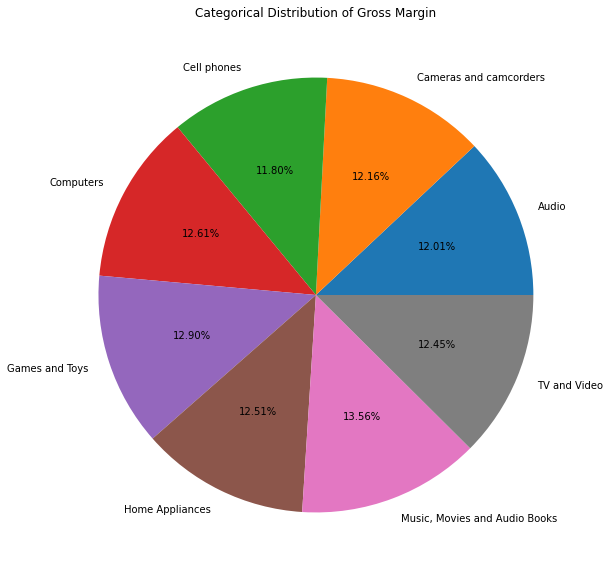

In [18]:
plt.figure(figsize=(10,10))
Categorical_Margin=df.groupby('category').agg({'Gross_Margin':'mean'}).reset_index()
plt.pie(Categorical_Margin.Gross_Margin,labels=Categorical_Margin.category,autopct="%0.2f%%")
plt.title('Categorical Distribution of Gross Margin')
plt.show()

In [19]:
Country_wise_Sales=df.groupby(['country','category']).agg({'Total_Sales':'sum','Total_Quantity':'sum'}).sort_values('Total_Sales',ascending=True).reset_index().head(56)
 

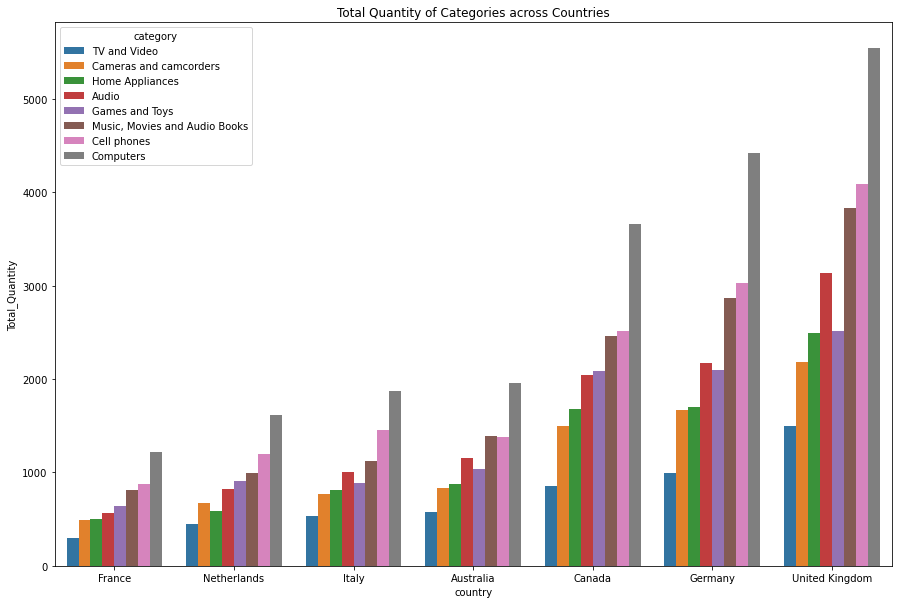

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(data=Country_wise_Sales,x='country',y='Total_Quantity',hue='category')
plt.title('Total Quantity of Categories across Countries')
plt.show()

### We observe product categories performing differently in each country
 
- Most of the countries perofroms bad in 3 categories TV and Video, cameras and camcoders,home appliances
- Top performing categories across all countries Computers, cell phones,music movies and audio books
- Audio ,Games and Toys performs avg in all countries

- According to the bar plot price sensitive categories are TV and Video, cameras and camcoders,home appliances

- Are there product categories that consistently underperform in certain regions despite strong performance elsewhere?

In [21]:
Low_performing_category=df.groupby(['category','country']).agg({'Total_Sales':'sum'}).sort_values('Total_Sales',ascending=True).head(20).reset_index()
Low_performing_category

,category,country,Total_Sales
0,TV and Video,France,3616.61
1,TV and Video,Netherlands,5650.72
2,Cameras and camcorders,France,6068.52
3,Home Appliances,France,6270.10
4,TV and Video,Italy,6716.57
5,Audio,France,6960.73
6,TV and Video,Australia,7128.94
7,Home Appliances,Netherlands,7529.86
8,Games and Toys,France,8010.53
9,Cameras and camcorders,Netherlands,8409.18


<AxesSubplot:xlabel='Total_Sales', ylabel='category'>

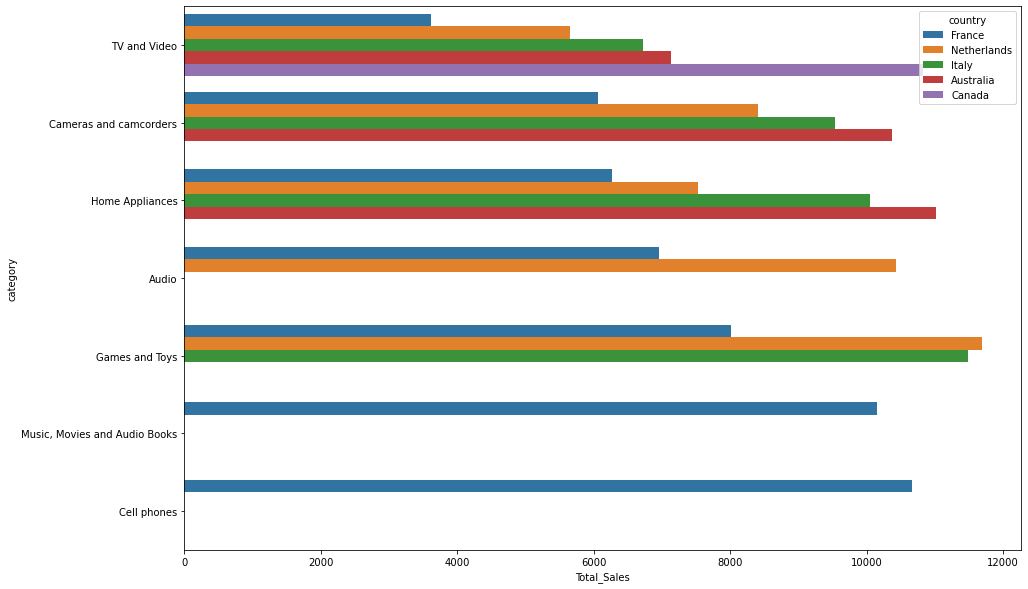

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(data=Low_performing_category,x='Total_Sales', hue='country',y='category')

### As we observe low perofrming product categories are performing differently in each country

- TV and Video category is perofrming bad in France and good in Canada
- Cameras and Camcoders are performimg bad in France and good in Italy and Australia
- Home appliances are bad in France and good in Italy and Australia

### According to the performace in different countries we can update the price of products 

 - What are the top performing products in sales but low profits?

In [23]:
products=df.groupby('product_name').agg({'Total_Sales':'sum','Gross_Profit':'sum'})
products=products[products['Total_Sales']<1500]
products.shape

(2062, 2)

In [24]:
top_performing_quantile=df['Total_Sales'].quantile(0.75)
top_performing_quantile

54.085

In [25]:
low_performing_quantile=df['Gross_Profit'].quantile(0.25)
low_performing_quantile

5.93

In [26]:
target_products=df[(df['Total_Sales']>top_performing_quantile) & (df['Gross_Profit']<low_performing_quantile)]
target_products.shape

(152, 17)

In [27]:
final_products=target_products.groupby('product_name').agg({'Total_Sales':'sum','Gross_Profit':'sum'})
final_products.shape

(39, 2)

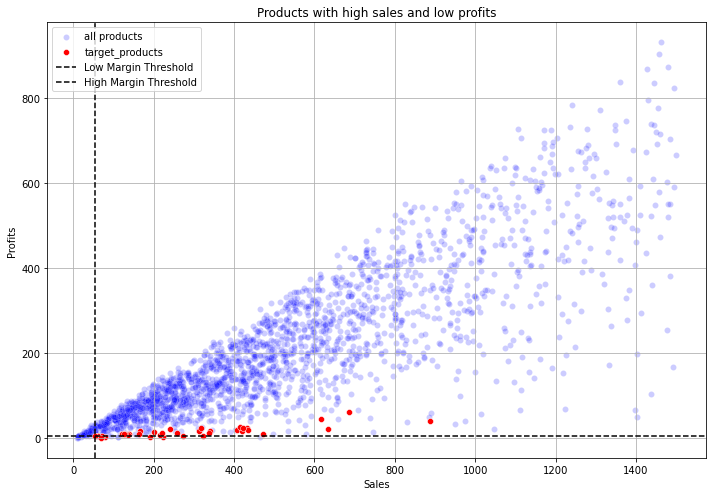

In [28]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=products,x='Total_Sales',y='Gross_Profit',color='blue', label='all products',alpha=0.2)
sns.scatterplot(data=final_products,x='Total_Sales',y='Gross_Profit',color='red',label='target_products')

plt.axhline(low_performing_quantile,linestyle='--',color='black',label='Low Margin Threshold')
plt.axvline(top_performing_quantile,linestyle='--',color='black',label='High Margin Threshold')

plt.title('Products with high sales and low profits')
plt.xlabel('Sales')
plt.ylabel('Profits')
plt.tight_layout()
plt.legend(loc='upper left')
plt.grid()
plt.show()

- There are 39 unique target_produts
- The target_products are the products with high demand but with low profits, if we increase price as the products is in demand they won't get saturated even if prices were increased 
- But we have to do update prices according to regions, we have to observe these target_products were performing good in all regions or in some particular regions

In [29]:
Countries=target_products.groupby('country')['Total_Sales','Gross_Profit'].sum().reset_index().sort_values('Total_Sales',ascending=False)

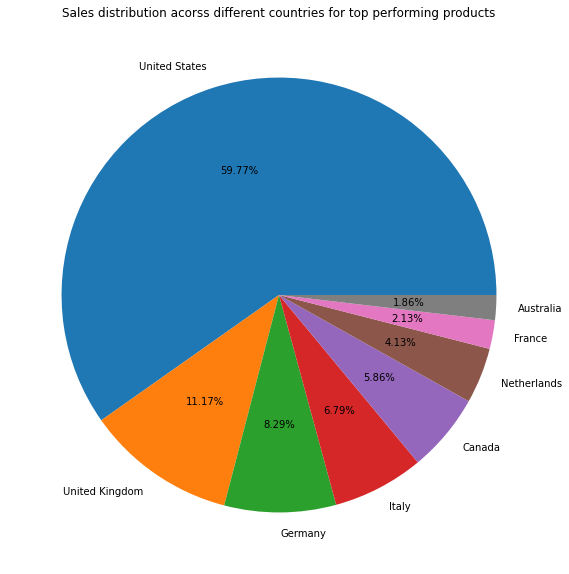

In [30]:
plt.figure(figsize=(10,10))
plt.pie(Countries.Total_Sales,labels=Countries.country,autopct="%0.2f%%")
plt.title('Sales distribution acorss different countries for top performing products')
plt.show()

- According to the target products distribution we have to focus more on US,UK,Germany and Italy,this places give more profits to us if we update our price optimally, especially US(59.77%)
- Other countries gives us less profits, so we should increse the price by small amount or should be reamin same

- What are the top performing customers according to sales and how much they contribute towards total sales?

In [31]:
target_customers=df.groupby(['Customer_Name','country']).agg({'Total_Sales':'sum','Gross_Profit':'sum','Gross_Margin':'mean'}).reset_index().sort_values('Total_Sales',ascending=False).head(1178)
target_customers['Total_Sales'].sum()

698542.78

In [32]:
df['Total_Sales'].sum()

2474739.0300000003

In [33]:
round(target_customers['Total_Sales'].sum()/df['Total_Sales'].sum(),4)*100

28.23

In [34]:
target_countries=target_customers.groupby('country').agg({'Total_Sales':'sum','Gross_Margin':'mean'}).reset_index()

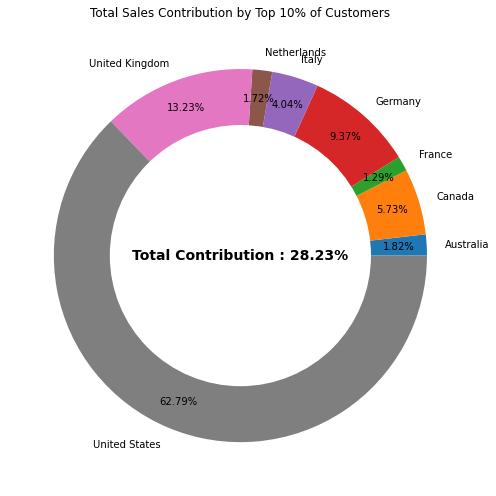

In [35]:
fig,ax=plt.subplots(figsize=(10,7))
Contribution=round((target_customers['Total_Sales'].sum()/df['Total_Sales'].sum())*100,2)
plt.pie(target_countries.Total_Sales,labels=target_countries.country,autopct="%0.2f%%",pctdistance=0.85)

centre_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.text(0,0,f'Total Contribution : {Contribution}%',fontsize=14,fontweight='bold',ha='center',va='center')
plt.title('Total Sales Contribution by Top 10% of Customers')

plt.tight_layout()
plt.show()

- Target customers are more from US,UK,Germany,Canada here we can focus on updating to best price to get more profit margin

- What are the products with low sales and high profits?

In [36]:
all_products=df.groupby('product_name').agg({'Total_Sales':'sum','Gross_Profit':'sum'})
all_products.shape

(2492, 2)

In [37]:
low_performance_margin=df['Total_Sales'].quantile(0.38)
low_performance_margin

24.28

In [38]:
high_performance_margin=df['Gross_Profit'].quantile(0.56)
high_performance_margin

13.16

In [39]:
target=df[(df['Total_Sales']<low_performance_margin) & (df['Gross_Profit']>high_performance_margin)]
target.shape

(67, 17)

In [40]:
final=target.groupby(['product_name','country']).agg({'Total_Sales':'sum','Gross_Profit':'sum'}).reset_index()
final.shape

(28, 4)

In [41]:
final_country=final.groupby('country').agg({'Total_Sales':'sum','Gross_Profit':'sum'}).reset_index()
final_country

,country,Total_Sales,Gross_Profit
0,Australia,95.86,53.88
1,Canada,95.48,53.38
2,France,48.26,27.32
3,Germany,168.14,94.32
4,Italy,47.74,26.76
5,Netherlands,23.80,13.28
6,United Kingdom,215.86,121.48
7,United States,911.20,512.34


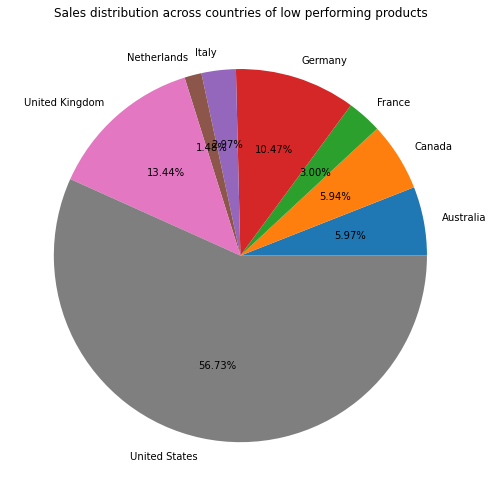

In [42]:
plt.figure(figsize=(7,7))
plt.pie(final_country.Total_Sales,labels=final_country.country,autopct="%0.2f%%")
plt.title('Sales distribution across countries of low performing products')
plt.tight_layout()
plt.show()

- Netherlands, Italy, France, Canada and Australia are the countries who were not showing intrest to buy low performing products, possibly due to high prices, suggests us that reduce of price may increase the sales in that countries
- Eventhough prices are high US, UK, Germany were giving more sales, possibly due to there intrest towards quality of the products irrespective of its price, suggest to keep the price constant, may increse further there will be no change in the sales from these countries

- What are the top and low performing states in each country according to sales?

In [43]:
high_performing_states = (df.groupby("country", group_keys=False).apply(lambda x: x.nlargest(10, "Total_Sales")))

high_performing_states=high_performing_states[['state','Store_Country','Total_Sales',
                                               'Total_Quantity','Gross_Profit','Gross_Margin']] 

high_performing_states.head()

,state,Store_Country,Total_Sales,Total_Quantity,Gross_Profit,Gross_Margin
61600,New South Wales,Australia,149.3,10.0,64.8,0.43
59771,Victoria,Australia,147.8,10.0,92.6,0.63
56620,Queensland,Australia,145.4,10.0,76.4,0.53
54164,New South Wales,Australia,143.2,10.0,46.5,0.32
53583,New South Wales,Australia,142.9,10.0,54.0,0.38


In [44]:
low_performing_states = (df.groupby("country", group_keys=False).apply(lambda x: x.nsmallest(10, "Total_Sales")))

low_performing_states=low_performing_states[['state','Store_Country','Total_Sales',
                                             'Total_Quantity','Gross_Profit','Gross_Margin']]

low_performing_states.head()

,state,Store_Country,Total_Sales,Total_Quantity,Gross_Profit,Gross_Margin
2,Queensland,Australia,10.00,1.0,0.94,0.09
100,New South Wales,Australia,10.01,1.0,1.12,0.11
163,New South Wales,Australia,10.02,1.0,2.09,0.21
344,New South Wales,Australia,10.04,1.0,3.64,0.36
390,New South Wales,Online,10.05,1.0,1.25,0.12


Is there a significant difference between top performing and low performing states?

Hypothesis:


$H_0$ (Null Hypothesis): There is no significant difference in Gross Profits of top performing and low performing states.

$H_1$ (Alternative Hypothesis): The Gross Profits of top performing and low performing states are significantly different.

In [45]:
top_states=high_performing_states['Gross_Profit']
low_states=low_performing_states['Gross_Profit']


t_stat, p_value=ttest_ind(top_states,low_states,equal_var=False)

print(f'T_Statistics:T-stat: {t_stat:.4f}, P_value: {p_value:.4f}')

if p_value<0.05:
    print("Reject 𝐻0: The Gross Profits of top performing and low performing states are significantly different.")
else:
    print('Accept H1: There is no significant difference in Gross Profits of top performing and low performing states.')

T_Statistics:T-stat: 36.5294, P_value: 0.0000
Reject 𝐻0: The Gross Profits of top performing and low performing states are significantly different.
